### Install and Import Libraries

In [1]:
!pip install --upgrade pandas
!pip install --upgrade google-api-python-client
!pip install --upgrade seaborn
!pip install pandas-gbq -U

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: numpy>=1.9.0 in /opt/conda/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.6/site-packages (from python-dateutil>=2->pandas)
Requirement already up-to-date: google-api-python-client in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: six<2dev,>=1.6.1 in /opt/conda/lib/python3.6/site-packages (from google-api-python-client)
Requirement already up-to-date: httplib2<1dev,>=0.9.2 in /opt/conda/lib/python3.6/site-packages (from google-api-python-client)
Requirement already up-to-date: uritemplate<4dev,>=3.0.0 in /opt/conda/lib/python3.6/site-packages (from google-api-python-client)
Requirement a

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.io import gbq
import os

In [5]:
project_id="large-scale-183617"

In [6]:
rawDataQuery="""
SELECT MONTH(starttime) as trip_month, YEAR(starttime) as trip_year, COUNT(tripduration) as num_trips, AVG(tripduration) as trip_avg 
FROM 
  [bigquery-public-data:new_york.citibike_trips],
  [citibike_tripdata.tripdata_2016_10_to_2017_12],
  [citibike_tripdata.tripdata_jc_2015_09_to_2017_12] 
GROUP BY trip_month, trip_year ORDER BY trip_year, trip_month
"""

trips_by_month_year = gbq.read_gbq(query=rawDataQuery,dialect ='legacy', project_id=project_id)
trips_by_month_year.head()

Requesting query... ok.
Job ID: 09e990ce-b4cd-46d9-922c-ad19fa1644e8
Query running...
Query done.
Processed: 821.9 MB Billed: 822.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 54 rows.

Total time taken 2.98 s.
Finished at 2018-03-10 22:17:47.


,trip_month,trip_year,num_trips,trip_avg
0,7,2013,843416,998.100704
1,8,2013,1001958,979.580227
2,9,2013,1034359,905.020577
3,10,2013,1037712,825.614754
4,11,2013,675774,771.283866


Create a Spark DataFrame from the query data.

In [7]:
sdf_month_year = spark.createDataFrame(trips_by_month_year,["trip_month","trip_year","num_trips","trip_avg"])

In [8]:
sdf_month_year['trip_month_year'] = sdf_month_year["trip_month"].map(str) + sdf_month_year["trip_year"].map(str)

TypeError: 'Column' object is not callable

Pandas Dataframe

In [11]:
type(trips_by_month_year)

pandas.core.frame.DataFrame

In [19]:
func = lambda x: str(x).zfill(2)
trips_by_month_year['trip_year_month'] = trips_by_month_year["trip_year"].map(str) + trips_by_month_year["trip_month"].map(func)

In [22]:
trips_by_month_year.head(10)

,trip_month,trip_year,num_trips,trip_avg,trip_year_month
0,7,2013,843416,998.100704,201307
1,8,2013,1001958,979.580227,201308
2,9,2013,1034359,905.020577,201309
3,10,2013,1037712,825.614754,201310
4,11,2013,675774,771.283866,201311
5,12,2013,443966,751.873889,201312
6,1,2014,300400,733.968945,201401
7,2,2014,224736,874.519810,201402
8,3,2014,439117,715.556549,201403
9,4,2014,670780,831.708272,201404


In [21]:
trips_by_month_year = trips_by_month_year.drop(columns=['trip_month_year'])

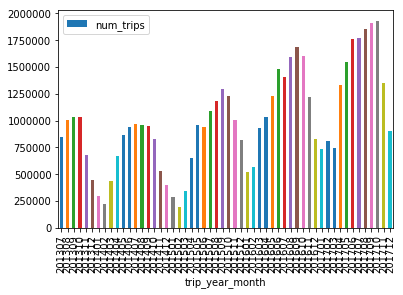

In [25]:
trips_by_month_year.plot(x='trip_year_month', y='num_trips', kind='bar')

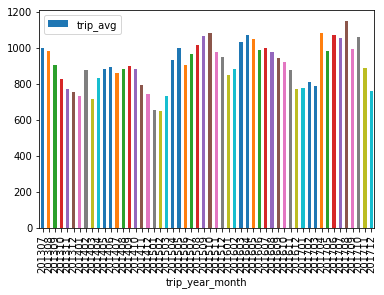

In [26]:
trips_by_month_year.plot(x='trip_year_month', y='trip_avg', kind='bar')

In [27]:
trips_by_hour_query="""
SELECT hour(starttime) as hour, count(tripduration) as num_trips, avg(tripduration) as avg_trip  
FROM 
  [bigquery-public-data:new_york.citibike_trips],
  [citibike_tripdata.tripdata_2016_10_to_2017_12],
  [citibike_tripdata.tripdata_jc_2015_09_to_2017_12] 
GROUP BY hour ORDER BY hour
"""

trips_by_hour = gbq.read_gbq(query=trips_by_hour_query,dialect ='legacy', project_id=project_id)
trips_by_hour.head()

Requesting query... ok.
Job ID: 060526c8-0148-44c8-a845-228ee1817642
Query running...
Query done.
Processed: 821.9 MB Billed: 822.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 24 rows.

Total time taken 2.8 s.
Finished at 2018-03-10 22:59:23.


,hour,num_trips,avg_trip
0,0,503260,971.179259
1,1,279703,1052.176498
2,2,163781,1080.449997
3,3,100823,1065.565536
4,4,96266,1229.489020


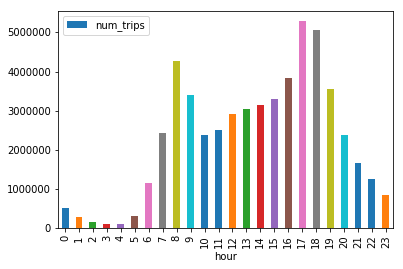

In [28]:
trips_by_hour.plot(x='hour', y='num_trips', kind='bar')

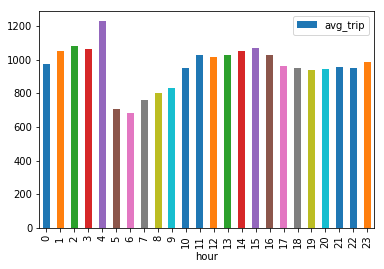

In [29]:
trips_by_hour.plot(x='hour', y='avg_trip', kind='bar')